In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [157]:
df = pd.read_csv("coches_segunda_mano-17-02-2025.csv")

In [158]:
df

,marca,anio,kilometraje,combustible,garantia,cambio,carroceria,plazas,potencia,puertas,color,precio,vendedor,consumo_medio,certificado,fecha_extraccion,referencia
0,SMART Forfour Electric Drive Passion,08/2017,28.699 km,Corriente eléctrica,24 meses,Automático,Berlina,4 asientos,82 cv,5 Puertas,NEGRO,12.900 €,MERCEDES COVISA\nProfesional,NaN,No,2025-02-17 11:40:11.279207,ref14816418
1,BMW X1 sDrive 18dA,06/2022,67.931 km,Diesel,24 meses,Automático,Todo Terreno,5 asientos,150 cv,5 Puertas,Schwarz (sólido) / Metalizado,32.500 €,BMW BERNESGA MOTOR\nProfesional,NaN,Si,2025-02-17 11:40:18.851751,ref13982447
2,BMW X5 xDrive 30dA xLine,05/2024,12.356 km,Diesel,24 meses,Automático,Todo Terreno,5 asientos,298 cv,5 Puertas,Alpinweiss sólido / Metalizado,80.900 €,BMW BERNESGA MOTOR\nProfesional,NaN,Si,2025-02-17 11:40:25.965835,ref14345945
3,BMW X5 xDrive 30dA,12/2022,49.000 km,Diesel,24 meses,Automático,Todo Terreno,5 asientos,286 cv,5 Puertas,Arktikgrau con efecto brillante (metalizado) /...,71.900 €,BMW BERNESGA MOTOR\nProfesional,NaN,Si,2025-02-17 11:40:33.905231,ref13108624
4,MERCEDES-BENZ Citan Tourer 110CDI Base,05/2023,43.191 km,Diesel,36 meses,Manual,Monovolumen,5 asientos,95 cv,5 Puertas,Negro / Metalizado,26.975 €,QUADIS AUTOLICA - ZONA FRANCA\nProfesional,NaN,No,2025-02-17 11:40:40.982140,ref14945273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,RENAULT Scénic 1.3 TCe Energy Zen 103kW,05/2018,108.900 km,Gasolina,12 meses,Manual,Monovolumen,5 asientos,140 cv,5 Puertas,azul / Metalizado,16.900 €,AUTOKIA\nProfesional,NaN,No,2025-02-17 11:51:40.521731,ref14816449
77,PORSCHE Cayenne 3.0 D,06/2012,215.000 km,Diésel,12 meses,Automático,"4x4, SUV o pickup",NaN,- cv,5 Puertas,Negro,23.990 €,MALLORCA CARS\nProfesional,NaN,No,2025-02-17 11:51:48.431324,ref14897967
78,AUDI A4 35 TDI Advanced S tronic 120kW,10/2019,94.576 km,Diesel,12 meses,Automático,Berlina,5 asientos,163 cv,4 Puertas,Blanco,22.700 €,LOVE CARS\nProfesional,NaN,No,2025-02-17 11:51:55.410392,ref11961085
79,DACIA Dokker 1.5Blue dCi Essential 70kW,01/2020,127.863 km,Diesel,12 meses,Manual,Monovolumen,5 asientos,95 cv,4 Puertas,blanco,9.900 €,AUTOKIA\nProfesional,NaN,No,2025-02-17 11:52:02.865176,ref13845209


In [159]:
df["color"].unique()

array(['NEGRO', 'Schwarz (sólido) / Metalizado',
       'Alpinweiss sólido / Metalizado',
       'Arktikgrau con efecto brillante (metalizado) / Metalizado',
       'Negro / Metalizado', 'Plateado / Metalizado', 'Rojo / Metalizado',
       'Negro', 'Alpinweiß (sólido) / Metalizado', 'Blanco',
       'rojo / Metalizado', 'Gris / Metalizado', 'azul / Metalizado',
       'Azul', 'Ninja Black', 'Engine Red (sólido)',
       'Black Pearl (metalizado) / Metalizado', 'Azul / Metalizado',
       'Alpine White (sólido)', 'Blue Flame (metalizado) / Metalizado',
       'blanco / Metalizado', 'gris / Metalizado',
       'Sunset Orange (metalizado)', 'gris',
       'Negro Agata Metalizado / Metalizado', 'blanco ártico', 'Oro',
       'Gris montaña metalizado', 'BLANCO', 'Naranja / Metalizado',
       'Gris', 'Rojo', 'BLANCO EVEREST CSOLIDOE', 'Alpinweiss (sólido)',
       'White Frost Tricoat', '-',
       'Silky Silver (metalizado) / Metalizado',
       'Black Sapphire (metalizado) / Metalizado', 

Transformaciones a las categorias

In [160]:
df[~df['vendedor'].str.contains("Profesional")]

,marca,anio,kilometraje,combustible,garantia,cambio,carroceria,plazas,potencia,puertas,color,precio,vendedor,consumo_medio,certificado,fecha_extraccion,referencia


In [161]:
df['color']=df['color'].apply(lambda x: x.upper())

In [162]:
df['color'].value_counts()

color
BLANCO                                                       12
NEGRO                                                        10
GRIS / METALIZADO                                             6
ROJO / METALIZADO                                             5
GRIS                                                          5
BLANCO / METALIZADO                                           4
NEGRO / METALIZADO                                            3
AZUL / METALIZADO                                             3
ROJO                                                          2
ALPINWEISS (SÓLIDO) / METALIZADO                              1
ALPINWEISS SÓLIDO / METALIZADO                                1
ARKTIKGRAU CON EFECTO BRILLANTE (METALIZADO) / METALIZADO     1
SCHWARZ (SÓLIDO) / METALIZADO                                 1
PLATEADO / METALIZADO                                         1
NINJA BLACK                                                   1
ENGINE RED (SÓLIDO)               

In [163]:
df['color'] = df['color'].apply(lambda x: 'NEGRO' if 'BLACK' in x else x)
df['color'] = df['color'].apply(lambda x: 'BLANCO' if 'WHITE' in x else x)
df['color'] = df['color'].apply(lambda x: 'ROJO' if 'RED' in x else x)
df['color'] = df['color'].apply(lambda x: 'AZUL' if 'BLUE' in x else x)
df['color'] = df['color'].apply(lambda x: 'GRIS' if 'GRAY' in x or 'GREY' in x else x)

In [164]:
df['color'].value_counts()

color
BLANCO                                                       14
NEGRO                                                        13
GRIS / METALIZADO                                             6
GRIS                                                          5
ROJO / METALIZADO                                             5
BLANCO / METALIZADO                                           4
AZUL / METALIZADO                                             3
NEGRO / METALIZADO                                            3
ROJO                                                          3
AZUL                                                          2
ALPINWEISS (SÓLIDO) / METALIZADO                              1
ALPINWEISS SÓLIDO / METALIZADO                                1
ARKTIKGRAU CON EFECTO BRILLANTE (METALIZADO) / METALIZADO     1
SCHWARZ (SÓLIDO) / METALIZADO                                 1
PLATEADO / METALIZADO                                         1
SUNSET ORANGE (METALIZADO)        

In [165]:
df['color'] = df['color'].str.split().str[0]
df['color'].value_counts()

color
BLANCO        21
NEGRO         17
GRIS          13
ROJO           9
AZUL           6
ALPINWEISS     3
PINTURA        2
SCHWARZ        1
PLATEADO       1
ARKTIKGRAU     1
SUNSET         1
NARANJA        1
ORO            1
-              1
SILKY          1
MARRÓN         1
BROOKLYN       1
Name: count, dtype: int64

In [166]:
colores = ["NEGRO", "BLANCO","AZUL","ROJO","GRIS"]
df['color'] = df['color'].apply(lambda x: x if x in colores else 'OTROS')

In [167]:
df['color'].value_counts()

color
BLANCO    21
NEGRO     17
OTROS     15
GRIS      13
ROJO       9
AZUL       6
Name: count, dtype: int64

In [168]:
df['vendedor'] = df['vendedor'].apply(lambda x: 'Concesionario' if 'Profesional' in x else 'Particular')

In [169]:
df

,marca,anio,kilometraje,combustible,garantia,cambio,carroceria,plazas,potencia,puertas,color,precio,vendedor,consumo_medio,certificado,fecha_extraccion,referencia
0,SMART Forfour Electric Drive Passion,08/2017,28.699 km,Corriente eléctrica,24 meses,Automático,Berlina,4 asientos,82 cv,5 Puertas,NEGRO,12.900 €,Concesionario,NaN,No,2025-02-17 11:40:11.279207,ref14816418
1,BMW X1 sDrive 18dA,06/2022,67.931 km,Diesel,24 meses,Automático,Todo Terreno,5 asientos,150 cv,5 Puertas,OTROS,32.500 €,Concesionario,NaN,Si,2025-02-17 11:40:18.851751,ref13982447
2,BMW X5 xDrive 30dA xLine,05/2024,12.356 km,Diesel,24 meses,Automático,Todo Terreno,5 asientos,298 cv,5 Puertas,OTROS,80.900 €,Concesionario,NaN,Si,2025-02-17 11:40:25.965835,ref14345945
3,BMW X5 xDrive 30dA,12/2022,49.000 km,Diesel,24 meses,Automático,Todo Terreno,5 asientos,286 cv,5 Puertas,OTROS,71.900 €,Concesionario,NaN,Si,2025-02-17 11:40:33.905231,ref13108624
4,MERCEDES-BENZ Citan Tourer 110CDI Base,05/2023,43.191 km,Diesel,36 meses,Manual,Monovolumen,5 asientos,95 cv,5 Puertas,NEGRO,26.975 €,Concesionario,NaN,No,2025-02-17 11:40:40.982140,ref14945273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,RENAULT Scénic 1.3 TCe Energy Zen 103kW,05/2018,108.900 km,Gasolina,12 meses,Manual,Monovolumen,5 asientos,140 cv,5 Puertas,AZUL,16.900 €,Concesionario,NaN,No,2025-02-17 11:51:40.521731,ref14816449
77,PORSCHE Cayenne 3.0 D,06/2012,215.000 km,Diésel,12 meses,Automático,"4x4, SUV o pickup",NaN,- cv,5 Puertas,NEGRO,23.990 €,Concesionario,NaN,No,2025-02-17 11:51:48.431324,ref14897967
78,AUDI A4 35 TDI Advanced S tronic 120kW,10/2019,94.576 km,Diesel,12 meses,Automático,Berlina,5 asientos,163 cv,4 Puertas,BLANCO,22.700 €,Concesionario,NaN,No,2025-02-17 11:51:55.410392,ref11961085
79,DACIA Dokker 1.5Blue dCi Essential 70kW,01/2020,127.863 km,Diesel,12 meses,Manual,Monovolumen,5 asientos,95 cv,4 Puertas,BLANCO,9.900 €,Concesionario,NaN,No,2025-02-17 11:52:02.865176,ref13845209


In [170]:
df['consumo_medio'].isnull().sum()

np.int64(81)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             81 non-null     object 
 1   anio              81 non-null     object 
 2   kilometraje       81 non-null     object 
 3   combustible       81 non-null     object 
 4   garantia          81 non-null     object 
 5   cambio            81 non-null     object 
 6   carroceria        81 non-null     object 
 7   plazas            61 non-null     object 
 8   potencia          81 non-null     object 
 9   puertas           81 non-null     object 
 10  color             81 non-null     object 
 11  precio            81 non-null     object 
 12  vendedor          81 non-null     object 
 13  consumo_medio     0 non-null      float64
 14  certificado       81 non-null     object 
 15  fecha_extraccion  81 non-null     object 
 16  referencia        81 non-null     object 
dtyp

In [172]:
df['carroceria'].value_counts()

carroceria
Todo Terreno                27
Berlina                     17
4x4, SUV o pickup            9
Berlina mediana o grande     8
Monovolumen                  7
Coupe                        4
Stationwagon                 4
Pequeño                      3
Familiar                     2
Name: count, dtype: int64

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas')
plt.show()

ValueError: could not convert string to float: 'SMART Forfour Electric Drive Passion'

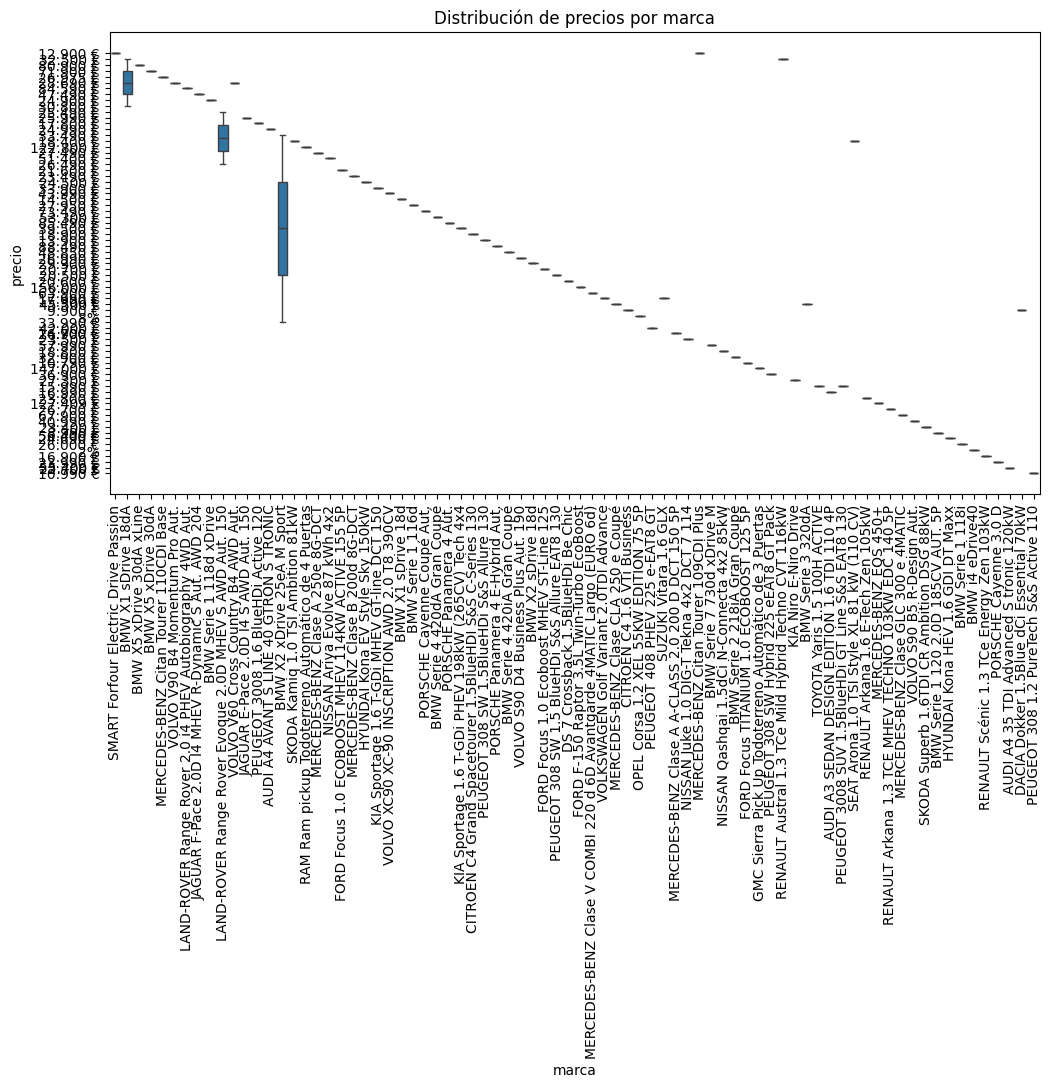

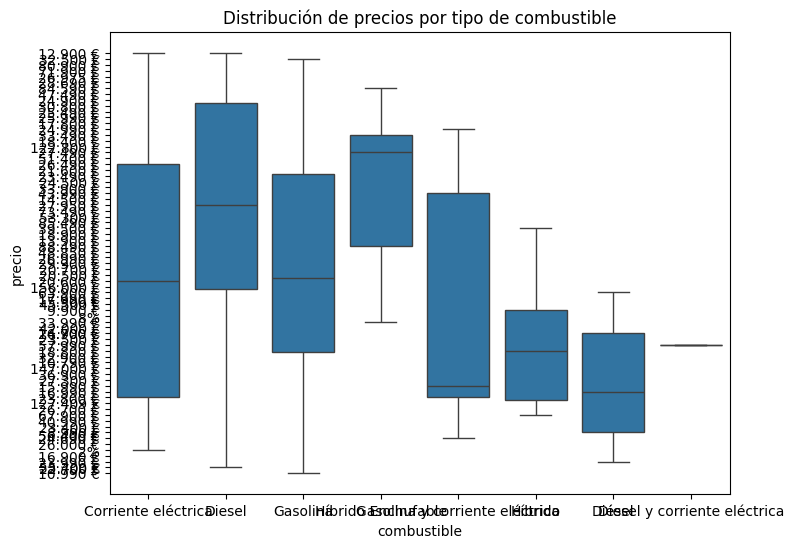

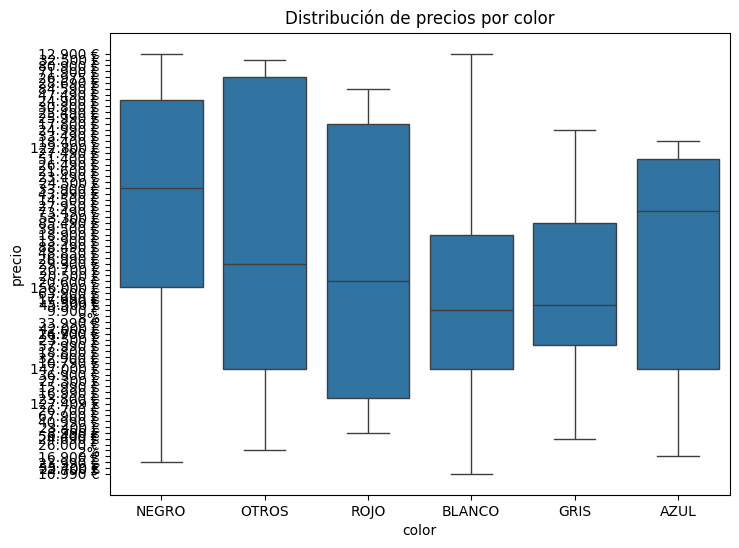

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='marca', y='precio', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de precios por marca')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='combustible', y='precio', data=df)
plt.title('Distribución de precios por tipo de combustible')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='precio', data=df)
plt.title('Distribución de precios por color')
plt.show()

In [ ]:
df['kilometraje'] = df['kilometraje'].str.replace(' km', '').str.replace('.', '').astype(float)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='kilometraje', y='precio', data=df)
plt.title('Relación entre kilometraje y precio')
plt.show()

df['potencia'] = df['potencia'].str.replace(' cv', '').astype(float)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='potencia', y='precio', data=df)
plt.title('Relación entre potencia y precio')
plt.show()

In [ ]:
df['anio'] = pd.to_datetime(df['anio'], format='%m/%Y')

plt.figure(figsize=(10, 6))
sns.lineplot(x='anio', y='precio', data=df)
plt.title('Evolución del precio según el año de fabricación')
plt.show()

In [ ]:
columnas = df.columns

for i in columnas:
    if df[i].value_counts() > 10:
        print(i)

NameError: name 'df' is not defined